### 로이터 뉴스 분류

In [1]:
from keras.datasets import reuters

#로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen  상위 1000개 단어
(X_train, y_train), (X_test, y_test) = reuters.load_data( num_words=1000,test_split=0.2)

In [2]:
from tensorflow.keras.preprocessing import sequence

# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [3]:
from keras.utils import np_utils

#원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000,100)) #1000개의 단어가 입력되어 100차원으로 출력

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(46, activation='softmax')) #46개의 뉴스 카테고리
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
import tensorflow as tf
with tf.device('/:GPU0'):
    from keras.callbacks import EarlyStopping
    early_stopping=EarlyStopping(patience=3)
    #               조기학습종료    기준 3회

    hist=model.fit(X_train,y_train,batch_size=128,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
57/57 [==============================] - 5s 57ms/step - loss: 2.7123 - accuracy: 0.3464 - val_loss: 2.4049 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 3s 51ms/step - loss: 2.2789 - accuracy: 0.3918 - val_loss: 2.1423 - val_accuracy: 0.4619
Epoch 3/100
57/57 [==============================] - 3s 52ms/step - loss: 2.0360 - accuracy: 0.4917 - val_loss: 1.9760 - val_accuracy: 0.4953
Epoch 4/100
57/57 [==============================] - 3s 55ms/step - loss: 1.8777 - accuracy: 0.5221 - val_loss: 1.7854 - val_accuracy: 0.5409
Epoch 5/100
57/57 [==============================] - 3s 56ms/step - loss: 1.7280 - accuracy: 0.5550 - val_loss: 1.7472 - val_accuracy: 0.5392
Epoch 6/100
57/57 [==============================] - 3s 56ms/step - loss: 1.6749 - accuracy: 0.5706 - val_loss: 1.6898 - val_accuracy: 0.5776
Epoch 7/100
57/57 [==============================] - 3s 56ms/step - loss: 1.5960 - accuracy: 0.5968 - val_loss: 1.6263 - val_accuracy: 0.5882
Epoch 

In [6]:
import tensorflow as tf
with tf.device('/:GPU0'):
    print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 8ms/step - loss: 1.4906 - accuracy: 0.6336

 정확도 : 0.6336


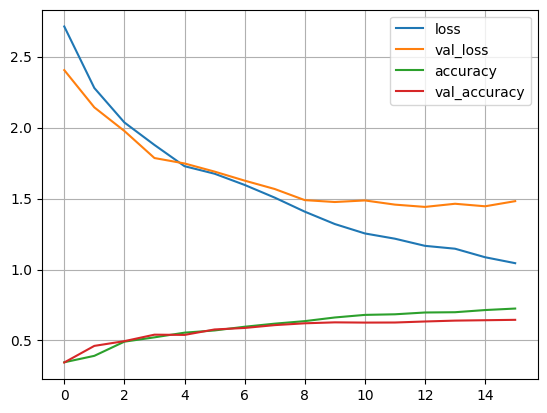

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [8]:
import numpy as np
import tensorflow as tf
with tf.device('/:GPU0'):
    pred=model.predict(X_test)

    np.argmax(pred[12])

71/71 [==============================] - 1s 8ms/step


In [9]:
np.argmax(y_test[12])

1